In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2022-03-04 15:45:21.837844: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-04 15:45:21.837936: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

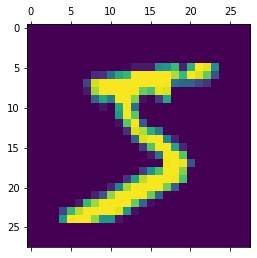

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/SGD", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

2022-03-04 16:01:14.739664: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6524 - accuracy: 0.8364
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3375 - accuracy: 0.9054
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2892 - accuracy: 0.9188
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2595 - accuracy: 0.9269
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2375 - accuracy: 0.9335


In [12]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit